<a href="https://colab.research.google.com/github/alagarde-bit/Computer-Vision/blob/main/hw03_Lagarde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4466 Computer Vision
## Homework 3 - Hybrid Images
### 3/10/2022
### *** Alex Lagarde ***

I would say things worked out good. I believe, after looping through each image, that my make gaussian, make laplacian, and show pyramid functions worked great. I think I got the outcomes desired in all three functions. I got the pyramid to look exactly how it was supposed to. When I had the debug boolean on, it displayed each level sequentially in both the laplacian and gaussian pyramid creations. Each image displayed appropriately as the gaussian pyramid images got more blurry and halved in size, while laplacian pyramid images edges appeared more and halved after each level. Additionally, my make hybrid image function was fairly good. Although not perfect, I think the function outputted the visual effects I desired to achieve, where the near image was fairly clear and the far image was fairly clear for which image was designed for each effect. I think the bear and tiger image worked the best, while the bicycle and motorcycle worked the worst. I think the strengths of my approach is finding the right parameters for my hybrid images and having successful functions to display desired outcomes per level. I could find the right parameters because my displayed images were correct. However, my weaknness was the hybrid images being a little more blurry and than desired. Not too blurry to not see the near and far images, but there is a little more bluriness than wanted especially for the cat and dog image. Maybe if I used different gaussian kernels, I would have less blurriness. I selected the levels and split parameters based on a guessing and checking approach. I realized when the levels were higher both images got more blurry and details would be missed. I also realized when the split was too high or too low, one image would dominate the other image in both aspects. I found that using a split number near the middle of the number of levels yielded the best results. For some reason, one level more of laplacian made for better results. I think that is because the first few levels of laplacian are cleaner, which is desired for the near image to easily spotted close, and the last couple levels of gaussian are really blurry, which means we want less of those. However, we want enough gaussians to have a stark difference between the near image and the far image. In the end, I found 5 or 6 levels and a split of 3 to be best. 

Not using the cv2.pyrdown function was a limitation that would have made things a lot easier. Instead of making a mistake using cv2.resize, cv2.pyrdown would  make for less of a chance for a mistake. In addition, not having access to a photo editing tool personally was a limitation because maybe I could have made some changes to images to align aspects. I could have brightened or darkened parts of pictures as well. With more time, I would experiment with image warping. Maybe rotations and translations could be useful to align things. I noticed in the cat and dog image in the instructions, there was a rotation clockwise. I would have taken time to play with those image warps to better align brightness and darkness. I would also play with different gaussian kernels for the gaussian pyramid and laplacian pyramid. I used the same kernel each time. I wonder what would happen if I changed it up. I want to use the tiger and bear hybrid image as my art gallery picture. I would call it: The Two Ferocious Hunters of The Wild. Ultimately, I think I completely met the requirements. I think all my functions are implemented correctly. I successfully and displayed three hybrid images that show one image near and one image far. Lastly, I addressed all six points of the discussion. I discussed how well things worked by saying it was fairly good. I defined my strengths as parameter selection and function implementation, while defining my weakness as some unwanted blurriness in the hybrid images. I discussed how I selected my parameters using guessing and checking. I revealed my technical limitations and my ideas for how I would do better with more time, which involved image warping and gaussian kernels. I selected the bear and tiger image for the art gallery, and I evaluated myself as completely meeting the requirements. 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def make_gaussian_pyramid(img, levels, debug):
  img_list = [img]
  curr_img = img.copy()
  if debug == True:
    plt.imshow(curr_img, cmap = 'gray')
    plt.show()
  for i in np.arange(levels-1):
    rows, cols = curr_img.shape[:2]
    gaussian_blurred = cv2.GaussianBlur(curr_img, (9,9), 0)
    subsampled = cv2.resize(gaussian_blurred, (cols // 2, rows // 2))
    img_list.append(subsampled)
    curr_img = subsampled
    if debug == True:
      plt.imshow(curr_img, cmap = 'gray')
      plt.show()
  return img_list

In [ ]:
def show_pyramid(pyramid):
  disp_img = np.zeros((pyramid[0].shape[0], pyramid[0].shape[1] + pyramid[1].shape[1]), float)
  pyramid[0] = cv2.normalize(pyramid[0], None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
  disp_img[:pyramid[0].shape[0], :pyramid[0].shape[1]] = pyramid[0]
  start_col = pyramid[0].shape[1]
  prev_row = pyramid[0].shape[0] - pyramid[0].shape[0]
  for i in np.arange(1, len(pyramid)):
    pyramid[i] = cv2.normalize(pyramid[i], None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    start_row = prev_row
    finish_row = prev_row + pyramid[i].shape[0]
    finish_col = start_col + pyramid[i].shape[1]
    disp_img[start_row:finish_row, start_col:finish_col] = pyramid[i]
    prev_row = finish_row
  return disp_img

In [ ]:
def make_laplacian_pyramid(img, levels, debug):
  img = img.astype(float)
  img_list = []
  curr_img = img.copy()
  gaussian_img = cv2.GaussianBlur(curr_img, (9,9), 0)
  laplachian_img = curr_img - gaussian_img
  img_list.append(laplachian_img)
  if debug == True:
    plt.imshow(laplachian_img, cmap = 'gray')
    plt.show()
  for i in np.arange(levels-1):
    rows, cols = curr_img.shape[:2]
    curr_img = cv2.resize(curr_img, (cols // 2, rows // 2))
    gaussian_img = cv2.GaussianBlur(curr_img, (9,9), 0)
    laplachian_img = curr_img - gaussian_img
    img_list.append(laplachian_img)
    if debug == True:
      plt.imshow(laplachian_img, cmap = 'gray')
      plt.show()
  return img_list

In [ ]:
def make_hybrid_image(img1, img2, levels, split):
  near = img1
  far = img2
  gaussian_near = make_gaussian_pyramid(near, levels, False)
  laplacian_near = make_laplacian_pyramid(near, levels, False)
  gaussian_far = make_gaussian_pyramid(far, levels, False)
  laplacian_far = make_laplacian_pyramid(far, levels, False)
  running_total = np.zeros((laplacian_near[0].shape[0],laplacian_near[0].shape[1]), float)
  for i in np.arange(split):
    laplacian_img = cv2.resize(laplacian_near[i], (laplacian_near[0].shape[1], laplacian_near[0].shape[0]))
    running_total += laplacian_img
  for j in np.arange(split, levels):
    gaussian_img = cv2.resize(gaussian_far[i], (gaussian_far[0].shape[1], gaussian_far[0].shape[0]))
    running_total += gaussian_img
  return running_total

Displaying littledog.jpg ...


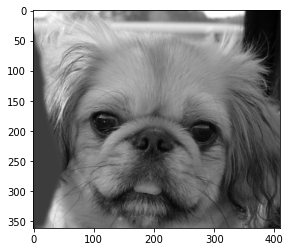

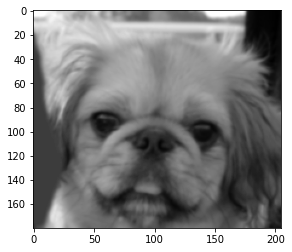

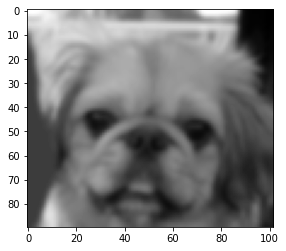

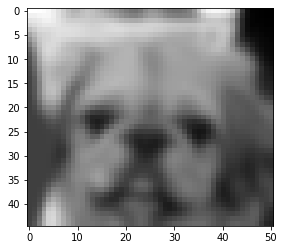

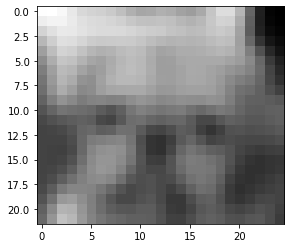

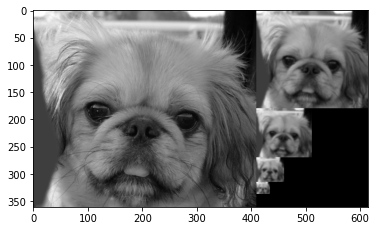

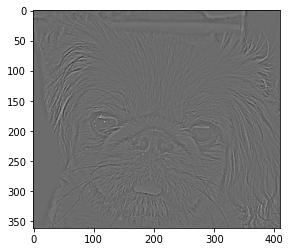

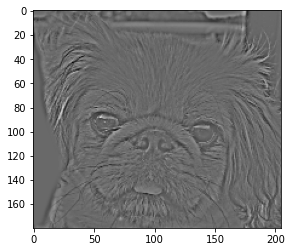

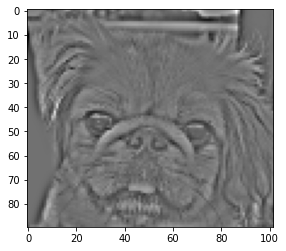

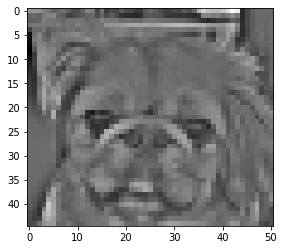

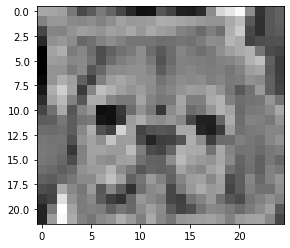

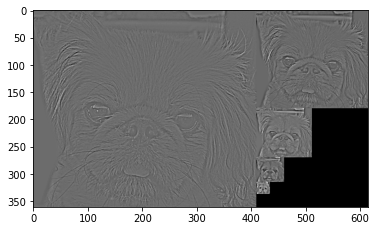

Displaying cat2.jpg ...


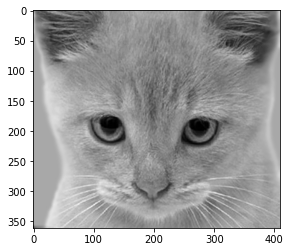

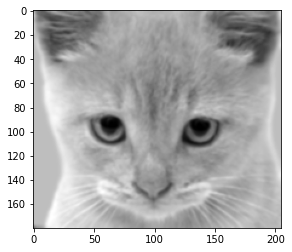

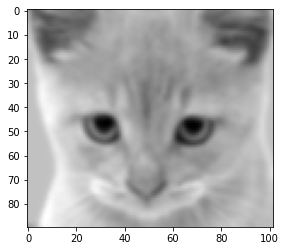

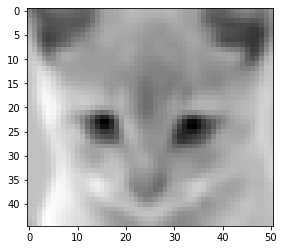

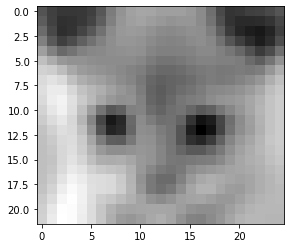

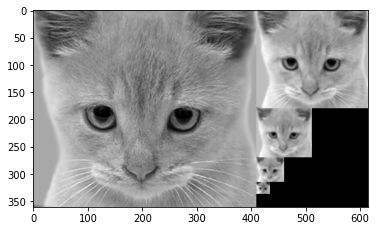

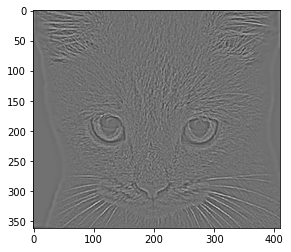

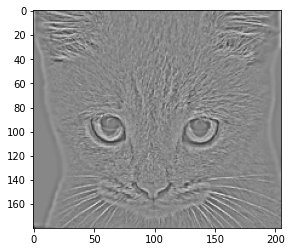

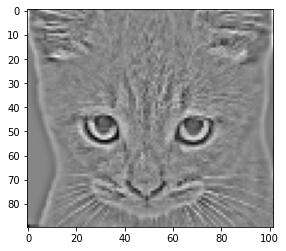

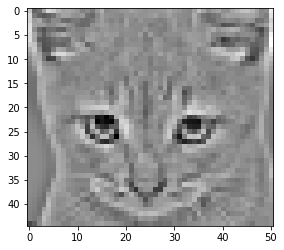

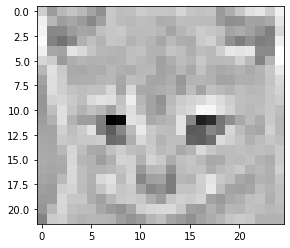

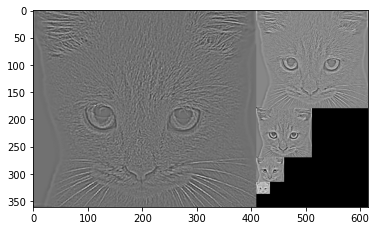

Displaying bicycle.jpg ...


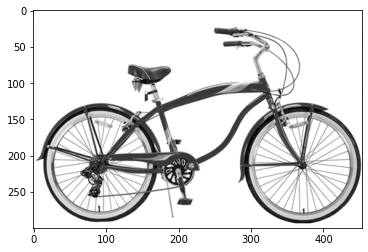

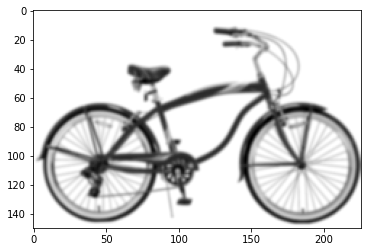

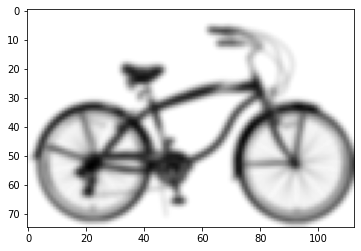

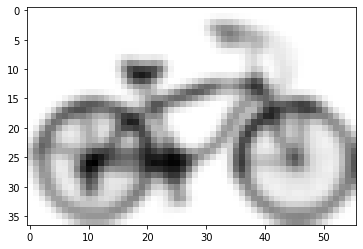

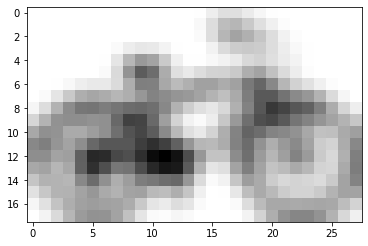

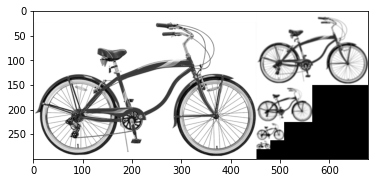

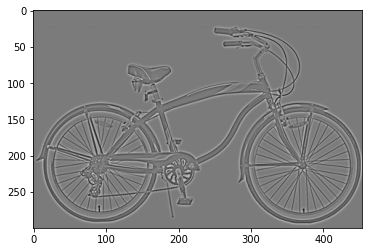

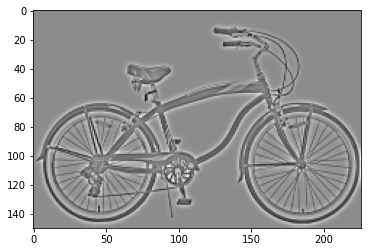

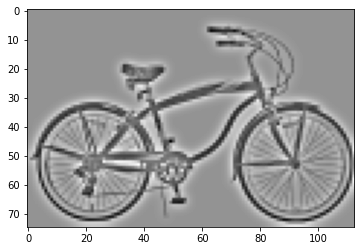

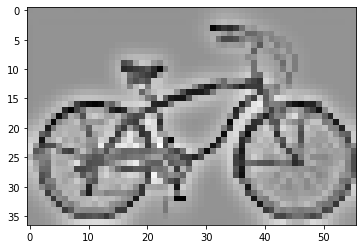

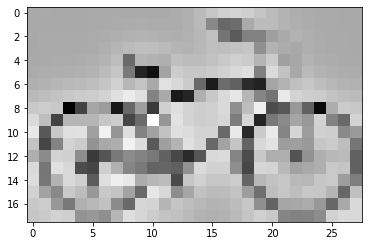

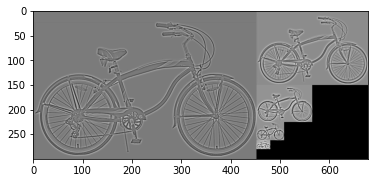

Displaying motorcycle.jpg ...


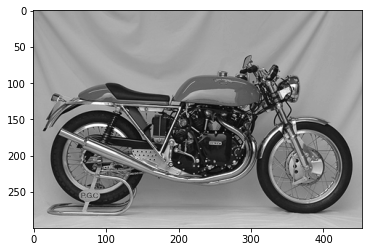

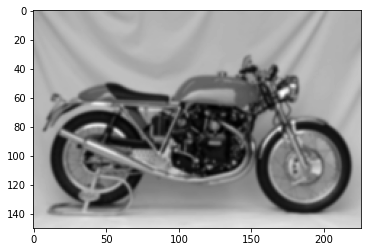

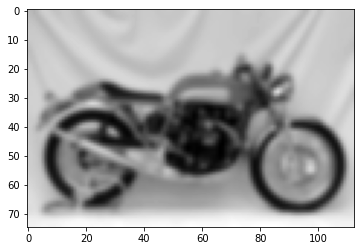

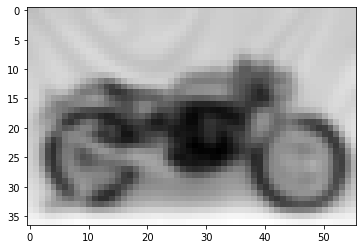

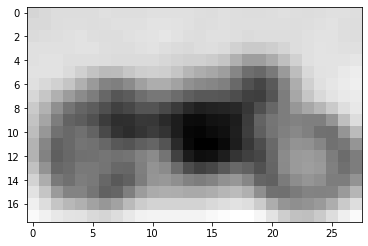

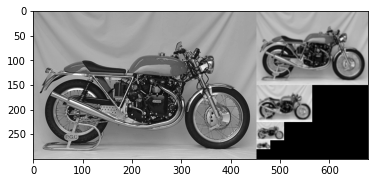

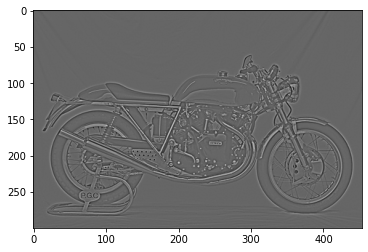

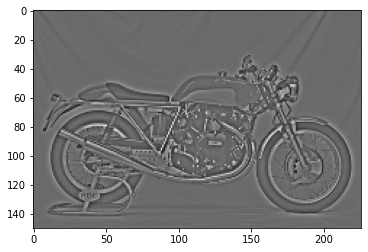

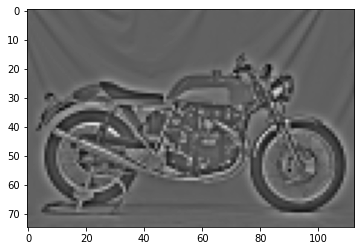

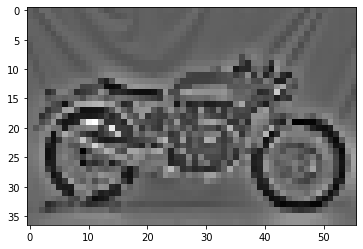

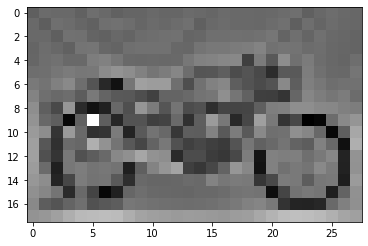

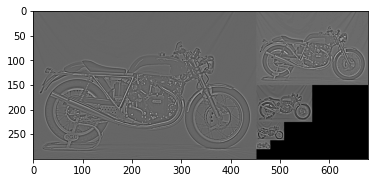

Displaying tiger.jpg ...


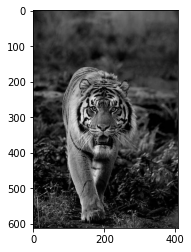

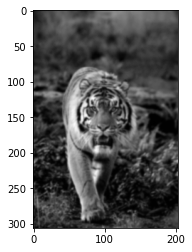

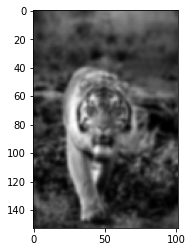

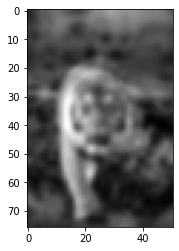

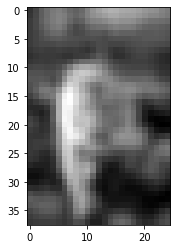

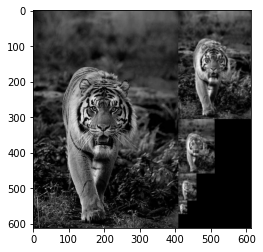

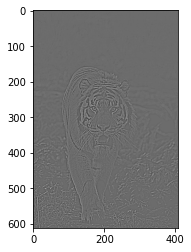

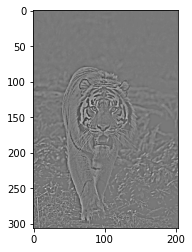

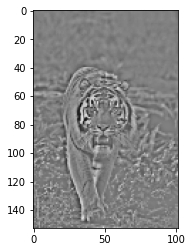

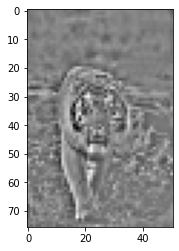

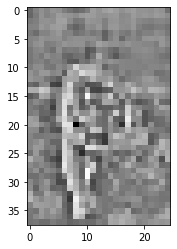

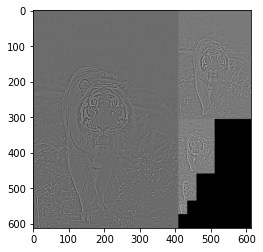

Displaying bear.jpg ...


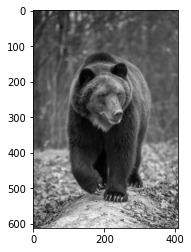

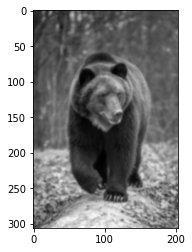

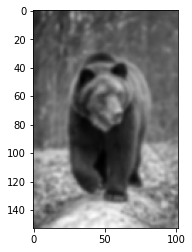

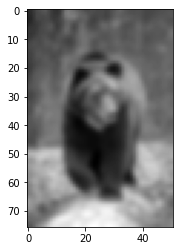

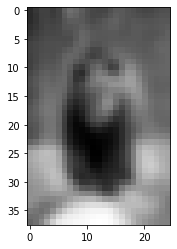

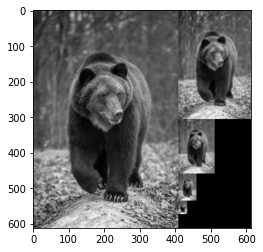

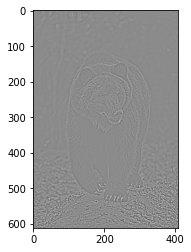

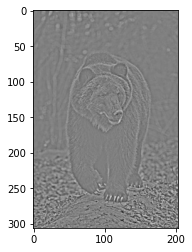

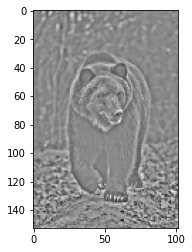

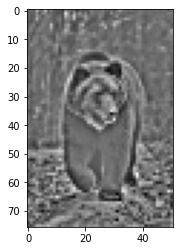

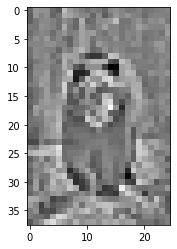

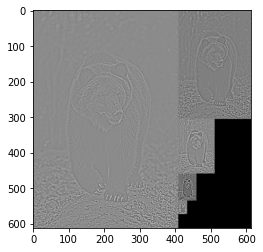

In [ ]:
# Testing first 3 functions
image_files = ['littledog.jpg', 'cat2.jpg', 'bicycle.jpg', 'motorcycle.jpg', 'tiger.jpg', 'bear.jpg']
for image in image_files:
  print('Displaying {} ...'.format(image))
  img = cv2.imread(image)
  grayscale = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  gaussian_pyramid = make_gaussian_pyramid(grayscale, 5, True)
  plt.imshow(show_pyramid(gaussian_pyramid), cmap='gray')
  plt.show()
  laplacian_pyramid = make_laplacian_pyramid(grayscale, 5, True)
  plt.imshow(show_pyramid(laplacian_pyramid), cmap='gray')
  plt.show()

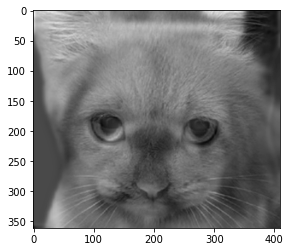

In [ ]:
# Hybrid Images
dog_img = cv2.imread('littledog.jpg')
cat_img = cv2.imread('cat2.jpg')
gray_dog = cv2.cvtColor(dog_img, cv2.COLOR_BGR2GRAY)
gray_cat = cv2.cvtColor(cat_img, cv2.COLOR_BGR2GRAY)
hybrid_img = make_hybrid_image(gray_cat, gray_dog, 5,3)
plt.imshow(hybrid_img, cmap = 'gray')
plt.show()


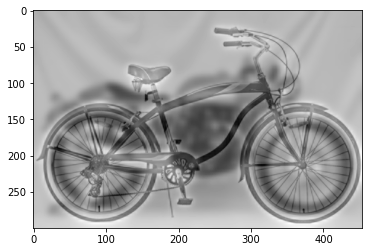

In [ ]:
motorcycle_img = cv2.imread('motorcycle.jpg')
bicycle_img = cv2.imread('bicycle.jpg')
gray_motorcycle = cv2.cvtColor(motorcycle_img, cv2.COLOR_BGR2GRAY)
gray_bicycle = cv2.cvtColor(bicycle_img, cv2.COLOR_BGR2GRAY)
hybrid_img = make_hybrid_image(gray_bicycle, gray_motorcycle, 6,3)
plt.imshow(hybrid_img, cmap = 'gray')
plt.show()


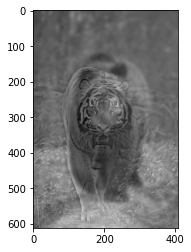

In [ ]:
bear_img = cv2.imread('bear.jpg')
tiger_img = cv2.imread('tiger.jpg')
gray_bear = cv2.cvtColor(bear_img, cv2.COLOR_BGR2GRAY)
gray_tiger = cv2.cvtColor(tiger_img, cv2.COLOR_BGR2GRAY)
hybrid_img = make_hybrid_image(gray_tiger, gray_bear, 5,3)
plt.imshow(hybrid_img, cmap = 'gray')
plt.show()